In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score, mean_squared_error

%matplotlib inline

In [2]:
# Generating synthetic classification data
X_cls, y_cls = make_classification(n_samples=100, n_features=2, n_classes=2, n_informative=2, n_redundant=0, random_state=42)

In [3]:
# Splitting the data into training and testing sets
X_cls_train, X_cls_test, y_cls_train, y_cls_test = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

In [4]:
# Training the Support Vector Classifier (SVC)
svc_classifier = SVC(kernel='linear', random_state=42)
svc_classifier.fit(X_cls_train, y_cls_train)

SVC(kernel='linear', random_state=42)

In [5]:
# Predicting on the testing set
y_cls_pred = svc_classifier.predict(X_cls_test)

In [6]:
# Calculating accuracy
accuracy = accuracy_score(y_cls_test, y_cls_pred)
print("Accuracy of SVC:", accuracy)

Accuracy of SVC: 0.95


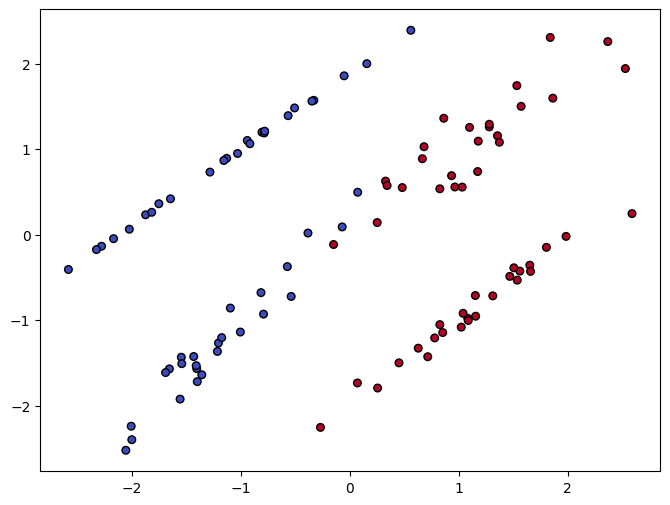

In [7]:
# Plotting the decision boundary
plt.figure(figsize=(8, 6))

plt.scatter(X_cls[:, 0], X_cls[:, 1], c=y_cls, cmap=plt.cm.coolwarm, s=30, edgecolors='k')

ax = plt.gca()

xlim = ax.get_xlim()
ylim = ax.get_ylim()

In [8]:
# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)

YY, XX = np.meshgrid(yy, xx)

xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svc_classifier.decision_function(xy).reshape(XX.shape)

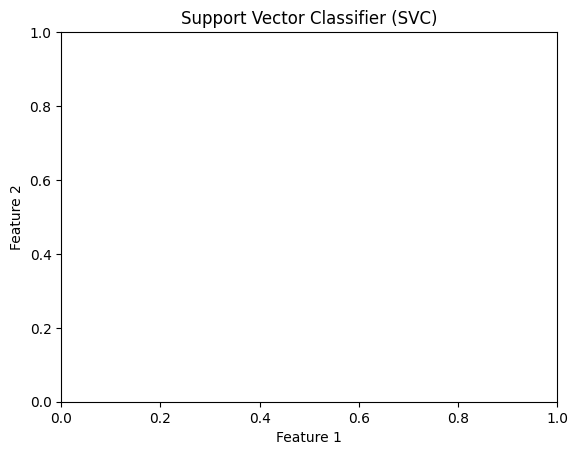

In [9]:
# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

ax.scatter(svc_classifier.support_vectors_[:, 0], svc_classifier.support_vectors_[:, 1], s=100,linewidth=1, facecolors='none', edgecolors='k')

plt.title('Support Vector Classifier (SVC)')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()